In [1]:
import pandas
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]
plt.style.use('ggplot')
import numpy as np

In [2]:
df = pandas.read_csv('E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\delivery-driver.tsv', sep='\t')

In [3]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [4]:
df.shape

(4000, 3)

In [5]:
### For the purposes of this example, we store feature data from our
### dataframe `df`, in the `X` and `y` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
X = df[['Distance_Feature', 'Speeding_Feature']]

The chart below shows the dataset for 4,000 drivers, with the distance feature on the x-axis and speeding feature on the y-axis.

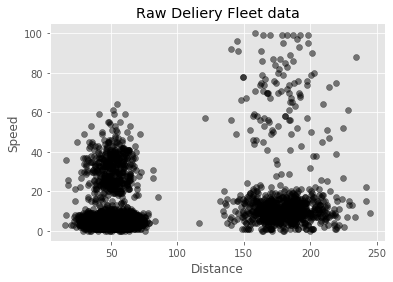

In [6]:
plt.scatter(X['Distance_Feature'], 
            X['Speeding_Feature'], 
            c='k', 
            alpha=0.5, 
            edgecolor='k')

plt.title("Raw Deliery Fleet data")
plt.xlabel('Distance')
plt.ylabel('Speed');


In [7]:
# Nc = range(1, 20)
# kmeans = [KMeans(n_clusters=i) for i in Nc]
# kmeans
# score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
# score
# pl.plot(Nc,score)
# pl.xlabel('Number of Clusters')
# pl.ylabel('Score')
# pl.title('Elbow Curve')
# pl.show()

# When we graph the plot, we see that the graph levels off rapidly after 3 
# clusters, implying that addition of more clusters do not explain much more 
# of the variance in our relevant variable; in this case stock returns.

In [14]:
kmeans=KMeans(n_clusters=3, random_state=100)

kmeansoutput=kmeans.fit(X)

In [15]:
print(np.unique(kmeans.labels_))

# len(np.unique(kmeans.labels_))


[0 1 2]


In [16]:
# Centroid values
kmeans.cluster_centers_

array([[180.34311782,  10.52011494],
       [ 50.04763437,   8.82875   ],
       [177.83509615,  70.28846154]])

Using domain knowledge of the dataset, we can infer that Group 1 is urban drivers and Group 2 is rural drivers.

In [17]:
centers = kmeans.cluster_centers_

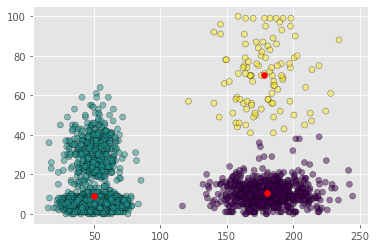

In [18]:
#colmap = {1: 'c', 2: 'g', 3: 'b', 4:'k', 5: ''}

plt.scatter(X['Distance_Feature'], 
            X['Speeding_Feature'], 
            c=kmeansoutput.labels_.astype(float), 
            alpha=0.5, 
            edgecolor='k')

for i in range(len(np.unique(kmeans.labels_))):
    plt.scatter(centers[i][0], centers[i][1], c='r')


Text(0, 0.5, 'WCSS')

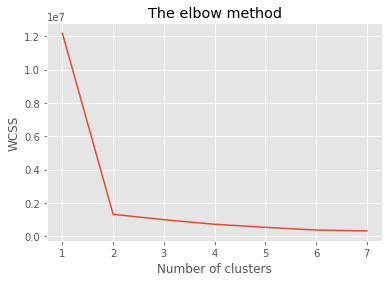

In [19]:
wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    max_iter = 300, 
                    n_init = 10, 
                    random_state = 0)
    
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 8), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

In [14]:
wcss

[12184626.129627975,
 1316420.8509477186,
 992634.060670247,
 719601.1096991899,
 534702.5445938024,
 372836.9652913574,
 319750.0484366306]